(array([  1.,   1.,   1.,   3.,   5.,   3.,   6.,   5.,  10.,  15.,  12.,
         24.,  18.,  37.,  52.,  42.,  60.,  81., 101.,  90.,  89., 104.,
        124., 167., 182., 254., 265., 239., 227.,   0., 178., 185., 150.,
        158., 127., 112., 102.,  64.,  50.,  42.,  39.,  35.,  25.,   2.,
         23.,   6.,   5.,   3.,   5.,   2.,   2.,   4.,   1.,   1.,   1.,
          0.,   0.,   1.,   1.,   2.]),
 array([-97.        , -96.03333333, -95.06666667, -94.1       ,
        -93.13333333, -92.16666667, -91.2       , -90.23333333,
        -89.26666667, -88.3       , -87.33333333, -86.36666667,
        -85.4       , -84.43333333, -83.46666667, -82.5       ,
        -81.53333333, -80.56666667, -79.6       , -78.63333333,
        -77.66666667, -76.7       , -75.73333333, -74.76666667,
        -73.8       , -72.83333333, -71.86666667, -70.9       ,
        -69.93333333, -68.96666667, -68.        , -67.03333333,
        -66.06666667, -65.1       , -64.13333333, -63.16666667,
        -62.2 

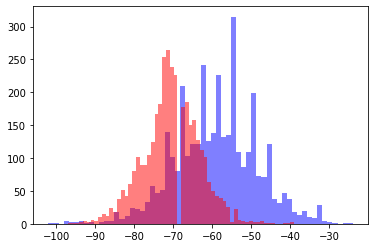

In [103]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline 

jog_walk_less_2_1hr = pd.read_csv("outside_walk_less_2m-1hr-clean.csv") 
jog_walk_greater_2_1hr = pd.read_csv("outside_walk_greater_2m-1hr-clean.csv") 

jog_walk_less_2_1hr['distance'] = '2'
jog_walk_greater_2_1hr['distance'] = '4'

import matplotlib;

matplotlib.pyplot.hist(jog_walk_less_2_1hr['RSSI'], color='b', alpha=0.5, bins=60)
matplotlib.pyplot.hist(jog_walk_greater_2_1hr['RSSI'], color='r',alpha=0.5, bins=60)

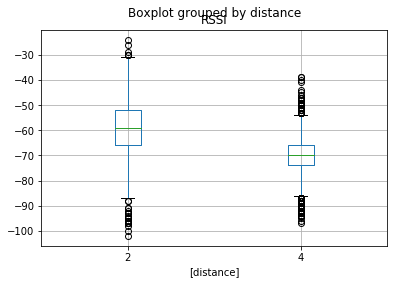

In [104]:
jog_walk_less_2_1hr['distance'] = 2
jog_walk_greater_2_1hr['distance'] = 4
jog_walk_1_hr = pd.concat([jog_walk_less_2_1hr, jog_walk_greater_2_1hr])

jog_walk_1_hr.boxplot(by =['distance'], column =['RSSI'], grid = True)


In [105]:
def computeMean(values, distance, M):
    y_true = [];
    y_score = [];
    size = len(values)
    for i in range(size):
        total = np.sum(values[i:i+M])
        y_true.append(distance)
        y_score.append(total/M);
    return (y_true, y_score)


def tpr(values, threshold):
    return np.count_nonzero(values>=threshold)/len(values)
                            
def tpr_for_m_in_n(values, threshold, m , n):
    count=0
    splits = 0;
    for i in range(len(values)):
        if(i+n <=len(values)):
            splits+=1
            c = np.count_nonzero(values[i:i+n]>=threshold)
            if(c>=m):
                count+=1
    
    return count/splits

def weightedAverage(values, weights):
    window_size = len(weights)
    results = [];
    for i in range(len(values)):
        if(i+window_size <=len(values)):
            sum = np.sum(values[i:i+window_size] * weights)
            results.append(round(sum, 2))
    return results;
            
        
        
    

import numpy as np
values = np.array([-30,-40,-30,-60,-50,-50])
print(tpr_for_m_in_n(values, -40, 1, 1))

values = np.array([50, 76, 80, 98, 50])
weights = np.array([.15, 0.2, 0.2, .45])

a = weightedAverage(values, weights)
print(f'size={len(a)}')
for i in a:
    print(i)
    
print(tpr(np.array([-10,-20,-30,-40]), -5))




0.5
size=2
82.8
69.5
0.0


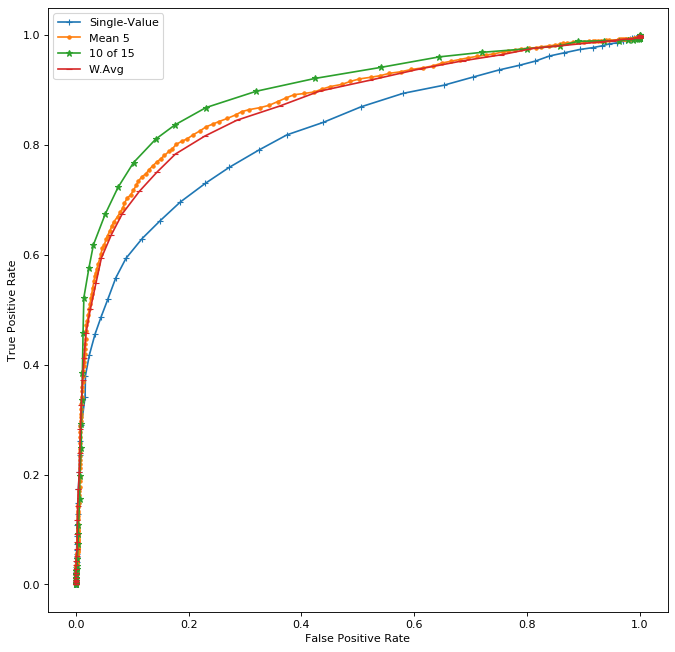

In [96]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

from sklearn import metrics

import time

#Single Value
y_true = jog_walk_1_hr['distance']
y_scores = jog_walk_1_hr['RSSI']

fpr_single, tpr_single, thresholds = metrics.roc_curve(y_true, y_scores,pos_label=2)

#Mean of 5
mean_size=5
y_true_less_2, y_score_less_2 = computeMean(jog_walk_less_2_1hr['RSSI'].values, 2, mean_size)
y_true_more_2, y_score_more_2 = computeMean(jog_walk_greater_2_1hr['RSSI'].values, 4, mean_size)

y_true_mean = y_true_less_2 + y_true_more_2
y_score_mean = y_score_less_2 + y_score_more_2

fpr_mean, tpr_mean, thresholds_mean = metrics.roc_curve(y_true_mean, y_score_mean,pos_label=2)

# M of N 

m = 10
n = 15
tpr_m_of_n_arr = []
fpr_m_of_n_arr = []
tic = time.perf_counter()
for threshold in thresholds:
    tpr_m_of_n = tpr_for_m_in_n(jog_walk_less_2_1hr['RSSI'].values, threshold, m, n)
    fpr_m_of_n = tpr_for_m_in_n(jog_walk_greater_2_1hr['RSSI'].values, threshold, m, n)
    
    tpr_m_of_n_arr.append(tpr_m_of_n)
    fpr_m_of_n_arr.append(fpr_m_of_n)
    
toc = time.perf_counter()
#print(f"tpr_for_m_in_n all {toc - tic:0.4f} seconds")


# Weighted average of 5 items
weights = np.array([.40, 0.25, 0.15, 0.15, 0.05])
weighted_average_less_2_1hr = weightedAverage(jog_walk_less_2_1hr['RSSI'].values, weights)
weighted_average_greater_2_1hr = weightedAverage(jog_walk_greater_2_1hr['RSSI'].values, weights)

tpr_weights_avg_arr = []
fpr_weights_avg_arr = []
for threshold in thresholds:
    tpr_weights_avg = tpr(weighted_average_less_2_1hr, threshold)
    fpr_weights_avg = tpr(weighted_average_greater_2_1hr, threshold)
   
    tpr_weights_avg_arr.append(tpr_weights_avg)
    fpr_weights_avg_arr.append(fpr_weights_avg) 


figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

pyplot.plot(fpr_single, tpr_single, marker='+', label='Single-Value')
pyplot.plot(fpr_mean, tpr_mean, marker='.', label=f'Mean {mean_size}')
pyplot.plot(fpr_m_of_n_arr, tpr_m_of_n_arr, marker='*', label=f"{m} of {n}")
pyplot.plot(fpr_weights_avg_arr, tpr_weights_avg_arr, marker='_', label=f"W.Avg")

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
        
            




